In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

This uses regression as a classifier.

## Logistic regression vs  linear regression

The formula for multivariate linear regression relating outcome $y$ to a matrix of variables $X$ is: 
$$y=\alpha + \beta X$$
You may also see it as $y=\beta X$, where $X$ includes an intercept variable with all values set to 1.  These are equivalent.

The formula for **binary logistic regression** relating $p$ (the probability of getting $y=1$ rather than $y=0$ in outcome variable $y$) to a matrix of variables $X$ is: 
$$ln\left(\dfrac p{1-p}\right)=\beta X$$

If $p$ is the probability of $y=1$, and there are only two possible values for $y$ ($0$ and $1$), then $1-p$ is the probability of $y=0$.  The ratio of $p$ to $1-p$ gives **the odds** of getting $y=1$.  For example, if an unfair coin has an 80% probability of turning up heads, then the odds of getting heads on any given flip are $.8/(1-.8)=4$.  In other words, for any given coin flip, you are four times more likely to get heads than tails.  Conversely, of course, the odds of getting tails are $.2/(1-.2)=.25$.  The convention is to calculate the odds of the more likely outcome over the less likely outcome, as odds less than $1$ (like $.25$) are not very intuitive.

After the transformation, logistic regression and linear regression behave in the same way and follow the same assumptions: _linearity_ (of the transformed probabilities and the predictors), _multivariate normality of the residuals_, _homoscedasticity_ (variance of the residuals is constant across all predicted values), and _low multicollinearity_. 


### Quick check

What are the odds of getting heads if you flip a fair coin?

## Why log?
You will also see $ln\left(\dfrac p{1-p}\right)$ summarized as $logit(p)$.  In either case, it represents the natural log of the odds of getting $y=1$.  We convert our binary outcome $y(0,1)$ into logged odds because regression requires normally distributed residuals, which come from a linear relationship between outcome and predictor. You can't get those from binary outcomes or odds on their own, as we will demonstrate.

First, let's create a continuous variable `x` and a binary variable `y` and graph them:

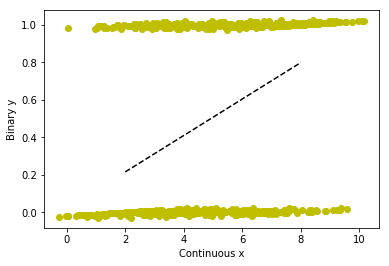

In [5]:
#set random seed so 'random' data is the same every time
np.random.seed(seed=456613)

# Create some data.
df = pd.DataFrame()
for probs in list(range(2, 9)):
    tmp = pd.DataFrame({
        'y': np.random.binomial(1, probs / 10, size=(1, 100))[0],
        'x': probs
    }) 
    df = df.append(tmp)

#continuous predictor
    x = df['x']
    
#binary outcome
    bin_y = df['y']
    
# Calculate linear regression for x and bin_y.
fit = np.polyfit(x,bin_y,1)

#work as function to return predicted value
fit_fn = np.poly1d(fit)

#add noise for graphing purposes
jitter = np.random.randn(700)

#display
plt.plot(x + jitter, bin_y + jitter / 100, 'yo', x, fit_fn(x), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Binary y')
plt.show()

Regressing this would be silly because the line is meaningless. 

In [ ]:
#make unique values
xvals = x.unique()

#calc and store odds
yodds = []
for xi in xvals
    y1_ct = bin_y[x==xi].sum() #number of trials y = 1
    y0_ct = len(bin_y[x == xi]) - y1_ct #number of trials y = 0
    yodds.append(y1_ct / y0_ct) #Odds of getting y = 1 for xi